In [57]:
import pandas as pd
a=pd.read_csv(r"C:\Users\subhadip sinha\OneDrive\CODING\PYTHON\TENSORFLOW\csv\Admission_Predict.csv")
a

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [58]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [59]:
a.duplicated().sum()

np.int64(0)

In [60]:
aa=a.drop(columns=["Serial No."])

In [61]:
x=aa.iloc[:,:-1]
y=aa.iloc[:,-1]

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [63]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [64]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [65]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

d:\PYTHON_environment\ENV2\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss="mean_squared_error",optimizer='Adam')

In [70]:
history=model.fit(x_train_sc,y_train,epochs=10,validation_split=0.2)
history

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7703 - val_loss: 0.5273
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6179 - val_loss: 0.4311
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5384 - val_loss: 0.3549
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4855 - val_loss: 0.2965
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4073 - val_loss: 0.2518
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3937 - val_loss: 0.2173
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3407 - val_loss: 0.1905
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3175 - val_loss: 0.1690
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2991 - val_loss: 0.1531
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2507 - val_loss: 0.1412


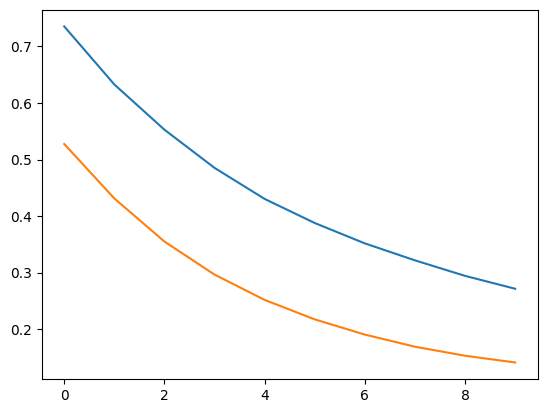

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [72]:
pred=model.predict(x_test_sc)
pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[ 0.94778377],
       [ 1.1324453 ],
       [ 0.66039526],
       [ 1.0130365 ],
       [ 0.9346545 ],
       [ 0.7272692 ],
       [ 0.29598022],
       [-0.05930565],
       [-0.07903898],
       [ 1.0378594 ],
       [-0.05777194],
       [ 0.84335095],
       [-0.08977075],
       [ 0.84595054],
       [-0.31625256],
       [ 0.988176  ],
       [ 0.05713262],
       [ 0.30583608],
       [ 1.0190346 ],
       [ 0.7520748 ],
       [ 0.28619927],
       [ 0.10299414],
       [-0.30549517],
       [ 0.02230694],
       [ 0.85239536],
       [ 0.9553288 ],
       [ 1.0194087 ],
       [ 0.20473042],
       [ 0.9303734 ],
       [ 0.9908038 ],
       [ 0.9992097 ],
       [ 0.68166816],
       [ 0.00220115],
       [ 0.46287435],
       [-0.01503131],
       [ 0.15132555],
       [ 0.21583013],
       [ 0.0094412 ],
       [ 0.03762744],
       [ 1.1486588 ],
       [ 0.96961266],
       [-0.02772799],
       [ 0.93708223],
       [ 0.67692244],
       [ 0.893282  ],
       [ 0

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)*100

-672.6566546379946

In [ ]:
# get better accuracy

model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))    # data set is linear 

d:\PYTHON_environment\ENV2\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(loss="mean_squared_error",optimizer='Adam')
model.fit(x_train_sc,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.8017 - val_loss: 0.7972
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6985 - val_loss: 0.6865
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5854 - val_loss: 0.5933
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5351 - val_loss: 0.5124
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4503 - val_loss: 0.4396
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3858 - val_loss: 0.3689
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3339 - val_loss: 0.2990
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2669 - val_loss: 0.2316
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2065 - val_loss: 0.1671
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1566 - val_loss: 0.1105
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1006 - val_loss: 0.0674
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0693 - val_loss: 0.0397
Epo

In [77]:
pred=model.predict(x_test_sc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)*100

77.59482042499361

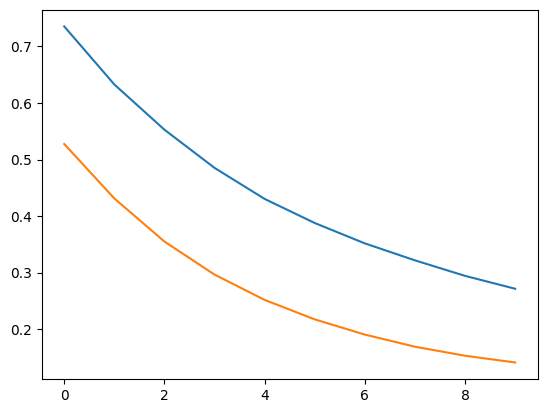

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])